### 데이터 준비

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wikipedia-movie-plots.zip')
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
plot = df['Plot']

### TDM

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer(max_features=2000, stop_words='english')

In [7]:
tdm = cv.fit_transform(plot)

In [8]:
tdm.shape

(34886, 2000)

In [9]:
words = cv.get_feature_names()

In [10]:
words

['000',
 '10',
 '100',
 '15',
 '20',
 'abandoned',
 'ability',
 'able',
 'aboard',
 'accept',
 'accepts',
 'accident',
 'accidentally',
 'accompanied',
 'accused',
 'accuses',
 'act',
 'acting',
 'action',
 'actions',
 'activities',
 'actor',
 'actress',
 'acts',
 'actually',
 'adam',
 'address',
 'admits',
 'adopted',
 'advances',
 'advantage',
 'advice',
 'advises',
 'affair',
 'afraid',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'agrees',
 'ahead',
 'aid',
 'air',
 'aircraft',
 'airport',
 'ajay',
 'al',
 'alan',
 'albert',
 'alcoholic',
 'alex',
 'ali',
 'alice',
 'alien',
 'aliens',
 'alive',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'amar',
 'america',
 'american',
 'amy',
 'anand',
 'andrew',
 'andy',
 'angel',
 'angela',
 'angeles',
 'anger',
 'angrily',
 'angry',
 'animal',
 'animals',
 'anjali',
 'ann',
 'anna',
 'anne',
 'annie',
 'announces',
 'answer',
 'answers',
 'anthony',
 'apart',
 'apartment',
 'apologizes',
 'apparent',
 'apparently',
 'appear',

### Word2Vec

In [11]:
from gensim.models import Word2Vec

In [12]:
from gensim.utils import simple_preprocess
# 텍스트를 gensim의 input 형태로 변형해주며 그 외 자잘한 처리들까지 해주는 모듈이다.

In [13]:
wv = Word2Vec(size=20,      # 단어 임베딩의 차원. 즉,20차원으로 만들어라
             min_count=10,  # 최소한 10번은 나온 단어만 사용한다
             workers=4,     # 동시에 사용할 코어 수=4
             sentences=[simple_preprocess(p) for p in plot])  # plot 안의 문서들을 각각 simple_processing하여 넣어준다

In [14]:
wv.wv

In [14]:
wv.wv.vocab

{'bartender': <gensim.models.keyedvectors.Vocab at 0x17c2276e7c8>,
 'is': <gensim.models.keyedvectors.Vocab at 0x17c2276e808>,
 'working': <gensim.models.keyedvectors.Vocab at 0x17c2276e848>,
 'at': <gensim.models.keyedvectors.Vocab at 0x17c2276e888>,
 'saloon': <gensim.models.keyedvectors.Vocab at 0x17c2276e908>,
 'serving': <gensim.models.keyedvectors.Vocab at 0x17c2276e988>,
 'drinks': <gensim.models.keyedvectors.Vocab at 0x17c2276e9c8>,
 'to': <gensim.models.keyedvectors.Vocab at 0x17c2276ea08>,
 'customers': <gensim.models.keyedvectors.Vocab at 0x17c2276e8c8>,
 'after': <gensim.models.keyedvectors.Vocab at 0x17c2276e948>,
 'he': <gensim.models.keyedvectors.Vocab at 0x17c2276ea48>,
 'fills': <gensim.models.keyedvectors.Vocab at 0x17c2276ea88>,
 'stereotypically': <gensim.models.keyedvectors.Vocab at 0x17c2276eac8>,
 'irish': <gensim.models.keyedvectors.Vocab at 0x17c2276eb08>,
 'man': <gensim.models.keyedvectors.Vocab at 0x17c2276eb48>,
 'bucket': <gensim.models.keyedvectors.Vocab 

In [15]:
wv.wv['money']
# 'money'가 임베딩된(20차원으로) 좌표 벡터 리턴

array([-6.07777   , -0.8908766 , -4.2427206 ,  2.3536344 ,  1.0341741 ,
        6.316462  ,  1.371732  , -3.0755997 ,  2.3624241 ,  1.8759315 ,
        1.2308962 ,  3.044971  ,  0.10669588,  2.3661618 , -2.6646917 ,
        1.767827  ,  4.931107  ,  4.6864467 ,  3.940239  ,  1.8682051 ],
      dtype=float32)

In [16]:
wv_words = sorted(set(words) & set(wv.wv.vocab))
# 전체 단어 중에서 wv.wv.vocab 안에 있는 단어들을 많이 나온 순서대로 sorting

In [17]:
wv_words

['abandoned',
 'ability',
 'able',
 'aboard',
 'accept',
 'accepts',
 'accident',
 'accidentally',
 'accompanied',
 'accused',
 'accuses',
 'act',
 'acting',
 'action',
 'actions',
 'activities',
 'actor',
 'actress',
 'acts',
 'actually',
 'adam',
 'address',
 'admits',
 'adopted',
 'advances',
 'advantage',
 'advice',
 'advises',
 'affair',
 'afraid',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'agrees',
 'ahead',
 'aid',
 'air',
 'aircraft',
 'airport',
 'ajay',
 'al',
 'alan',
 'albert',
 'alcoholic',
 'alex',
 'ali',
 'alice',
 'alien',
 'aliens',
 'alive',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'amar',
 'america',
 'american',
 'amy',
 'anand',
 'andrew',
 'andy',
 'angel',
 'angela',
 'angeles',
 'anger',
 'angrily',
 'angry',
 'animal',
 'animals',
 'anjali',
 'ann',
 'anna',
 'anne',
 'annie',
 'announces',
 'answer',
 'answers',
 'anthony',
 'apart',
 'apartment',
 'apologizes',
 'apparent',
 'apparently',
 'appear',
 'appearance',
 'appears',
 'approac

In [20]:
wvmat = wv.wv[wv_words]

In [21]:
wvmat

array([[ 4.4187436 , -3.367396  , -0.2090257 , ..., -1.9205414 ,
         1.239878  , -3.0202181 ],
       [-2.9117231 ,  0.12295383, -0.81292605, ...,  3.748284  ,
         5.1042747 ,  0.11328063],
       [-1.2471266 , -0.9475273 , -1.344294  , ...,  7.646856  ,
         8.562792  , -3.637375  ],
       ...,
       [ 3.1887927 ,  0.6739242 ,  1.0703213 , ..., -2.6063054 ,
        -0.06885971,  4.222765  ],
       [ 1.8490283 ,  2.3159597 ,  0.5382925 , ..., -0.9387763 ,
        -2.5706375 ,  3.4320998 ],
       [ 1.0223386 , -0.72540414,  1.0092745 , ...,  1.744857  ,
         1.40684   ,  1.935907  ]], dtype=float32)

In [22]:
wvmat.shape

(1995, 20)

### 시각화 (t-SNE)

**t-SNE는 embedding 공간의 점들 간 유사도 분포를 t-distribution 으로 바꿔, 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하는 차원축소 & 시각화 알고리즘이다.**  
주로 단어 벡터와 같은 **고차원 데이터를 시각화**하는 데 널리 쓰인다.  
(random성을 지니고 있어 실행할 때마다 output(그냥 위치 정도?만)이 바뀌기 때문에 차원축소보다 효과적인 시각화에 더 많이 쓰임)

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text  # text가 서로 겹치지 않고 예쁘게 나오도록 도와주는 패키지

In [29]:
w2v_tsne = TSNE()

In [30]:
w2v_pos = w2v_tsne.fit_transform(wvmat)

In [35]:
target = ['family', 'gun', 'money', 'gang', 'war', 'police', 'friend',
          'king', 'queen', 'prince', 'princess', 'father', 'mother', 'daughter', 'son','cash']
# 얘네를 가지고 한 번 시각화해봅시다!

In [36]:
indices = [wv_words.index(w) for w in target]

148

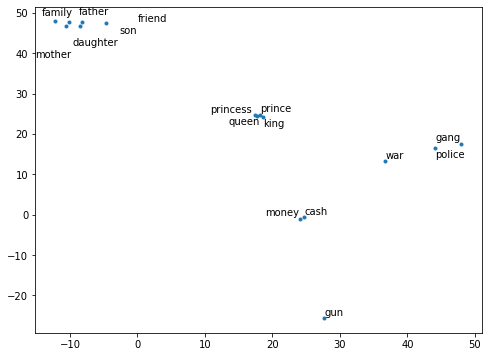

In [37]:
plt.figure(figsize=(8,6))
plt.plot(w2v_pos[indices, 0], w2v_pos[indices, 1], '.')
texts = [plt.text(w2v_pos[i, 0], w2v_pos[i, 1], w) for i, w in zip(indices, target)]
adjust_text(texts)

### 유사 단어

In [39]:
wv.wv.most_similar('family')
# cosine similarity 기준으로 'money'와 가장 가까운 단어들 출력

[('parents', 0.8783724904060364),
 ('household', 0.8768224716186523),
 ('mother', 0.8267135620117188),
 ('father', 0.8217716217041016),
 ('child', 0.8101437091827393),
 ('relatives', 0.8065510988235474),
 ('wife', 0.7913827896118164),
 ('life', 0.7912089824676514),
 ('grandfather', 0.7696288824081421),
 ('son', 0.7684180736541748)]

cash가 money와 가장 유사한 단어임을 알 수 있다!